In [1]:
# load necessary modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# read in uWF data, downloaded from watertofood.org 
path = "/home/jburdano/projects/uWF101/"
fil =  "watertofood_uWF-weight_15crops_15countries_1960-2016_5perc.csv"  
df = pd.read_csv(path+fil) #, ";",header=1)
df = df.mask(df==0)    # set zero values to nan-values
df.head(5)

,Unnamed: 0,Years,Item Name,Country Name,Item Category,Weight_t,uWF
0,NaN,1961,Apples,Austria,Fruits,456000.0,67.596703
1,1.0,1961,Apples,France,Fruits,2141999.0,314.213013
2,2.0,1961,Apples,Germany,Fruits,851001.0,147.557999
3,3.0,1961,Apples,Greece,Fruits,196000.0,1032.219971
4,4.0,1961,Apples,Hungary,Fruits,349500.0,793.695984


In [3]:
# # bring df in format useable with sns  /// not needed anymore after data cleaning due to different format
# dftest = pd.pivot_table(df, values=df.iloc[:,7:], index=None, columns=["Item Name","Country Name"])#.xs("1961")
# dftest.index.name = "Years"
# dfpl = pd.DataFrame(dftest.stack(level=0).stack(level=0))
# dfpl.reset_index(level=[0,1,2],inplace=True)
# dfpl.columns = ['Years', 'Item Name', 'Country Name', 'uWF']
# dfpl["Years"]=dfpl["Years"].astype(int)
# display(dfpl.shape)
# dfpl.head(5)

## Correlation of water content vs. water usage (uWF)

,uWF,water_content
Item Name,,
Apples,446.8,86
Asparagus,1810.0,94
Carrots and turnips,176.0,91
Cherries,1400.2,83
"Chillies and peppers, green",182.2,93
Cucumbers and gherkins,173.6,96
Grapes,779.1,82
Lettuce and chicory,156.1,95
Maize,1604.3,74


,Weight_t,uWF,water_content
Weight_t,1.000000,0.043496,-0.510670
uWF,0.043496,1.000000,-0.502532
water_content,-0.510670,-0.502532,1.000000


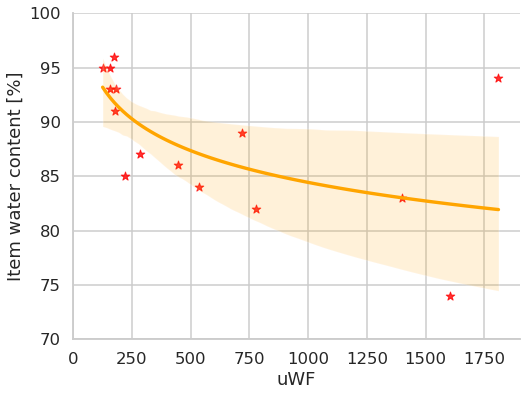

In [11]:
df_item_avg = df.loc[:,["Item Name","Item Category","Weight_t","uWF"]].groupby("Item Name").agg("mean").round(1)
df_item_avg

df_item_avg["water_content"] = [86,94,91,83,93,96,82,95,74,93,89,84,85,87,95]
display(df_item_avg.loc[:,["uWF","water_content"]])
#asp = df_item_avg.iloc[1,:]
#df_item_avg.iloc[1,:] = np.nan # "Asparagus"
display(df_item_avg.corr())

sns.set_theme(context='talk', style='whitegrid', font='sans-serif', 
              font_scale=1., color_codes=True, rc=None)
fig,ax = plt.subplots(figsize=[8,6])
#plt.style.use("fivethirtyeight")
ax = sns.regplot(x="uWF",y="water_content",data=df_item_avg,
                 color="orange",marker="*", logx=True, scatter_kws={"color":"red"});
# ax = sns.regplot(asp[0],94,
#                  color="blue",marker="*", scatter_kws={"color":"blue"});
ax.set_ylabel("Item water content [%]")
ax.set_xlim([0,1900])
ax.set_ylim([70,100])
sns.despine()

## Start Plotting: Histogram-like panel plot

In [5]:
sns.set_theme(context='talk', style='dark', font='sans-serif', 
              font_scale=.8, color_codes=True, rc=None)
pal = sns.color_palette("viridis", len(dfpl["Years"].unique()))


NameError: name 'dfpl' is not defined

In [ ]:
#fig,ax = plt.subplots(5,3,figsize=[80,20])
g=sns.catplot(x="Country Name", y="uWF", hue="Years",
            col="Item Name", col_wrap=3, aspect=.9, sharey=False,
            kind="strip", data=df, alpha = .7, palette=pal); #, palette=pal
# plt.clf()
# plt.colorbar(fig)
# ax.legend_.remove()
g.set_xticklabels(rotation=90);

In [ ]:
# norm = plt.Normalize(dfpl["Years"].min(), dfpl["Years"].max())
# sm = plt.cm.ScalarMappable(cmap="viridis", norm=norm)
# sm.set_array([])

g = sns.catplot(x="Item Name", y="uWF", hue="Years",
            col="Country Name", col_wrap=3, aspect=1.0, sharey=True,
            kind="strip", data=dfpl, palette=pal, alpha = .68); #palette=pal
#g.get_legend().remove()
#g.figure.colorbar(sm)
g.set_xticklabels(rotation=90);

In [ ]:
df["Item Category"].unique()